In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

In [3]:
mnist=keras.datasets.mnist

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [5]:
X_train_full=X_train_full/255.
X_test=X_test/255.

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(
    X_train_full,
    y_train_full,
    random_state=42
)

In [7]:
model=keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


2022-01-12 21:34:36.664682: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [15]:
history=model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid,y_valid)
)

Epoch 1/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9964 - val_loss: 0.1691 - val_accuracy: 0.9799
Epoch 2/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0106 - accuracy: 0.9972 - val_loss: 0.1575 - val_accuracy: 0.9801
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.1665 - val_accuracy: 0.9799
Epoch 4/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.1929 - val_accuracy: 0.9774
Epoch 5/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0133 - accuracy: 0.9965 - val_loss: 0.1882 - val_accuracy: 0.9764
Epoch 6/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0074 - accuracy: 0.9981 - val_loss: 0.2791 - val_accuracy: 0.9696
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.1885 - val_accuracy:

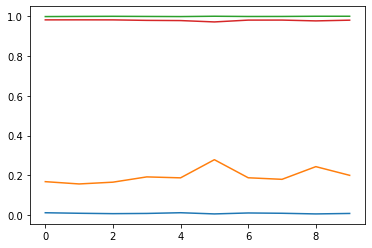

In [36]:
import matplotlib.pyplot as plt
d=history.history
plt.plot(d["loss"])
plt.plot(d["val_loss"])
plt.plot(d["accuracy"])
plt.plot(d["val_accuracy"])

plt.show()

In [37]:
y_pred=model.predict(X_test)

In [44]:
y_ac_pred=[]
for i in y_pred:
    y_ac_pred.append(np.argmax(i))
print(y_ac_pred[1],

[ True False False ... False False False]
[False  True False ... False False False]
[False False  True ... False False False]
[False False False ... False False False]
[False False False ...  True False False]
[False False  True ... False False False]
[False False False ...  True False False]
[False False False ... False False False]
[False False False ... False  True False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False  True]
[False False False ... False False False]
[False False False ... False False False]
[False False  True ... False False False]
[False False False ... False  True False]
[False False False ... False False False]
[ True False False ... False False False]
[False False False ... False False False]
[False False False ...  True False False]
[False False False ... False False False]
[False False False ... False False  True]
[False False False ... False False  True]
[False False False ... False  True

[False False False ... False False False]
[False False False ... False False False]
[False False False ... False  True False]
[False False False ...  True False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False  True]
[False False  True ... False False False]
[ True False False ... False False False]
[False False False ... False  True False]
[False False False ... False  True False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False  True ... False False False]
[False False False ... False  True False]
[ True False False ... False False False]
[False False False ... False  True False]
[False False False ... False False False]
[False False False ... False False  True]
[False False False ... False  True False]
[False False  True ... False False False]
[False False False ... False False

[False False False ... False False False]
[False  True False ... False False False]
[ True False False ... False False False]
[False  True False ... False False False]
[False False False ... False False False]
[ True False False ... False False False]
[False  True False ... False False False]
[False False  True ... False False False]
[False False  True ... False False False]
[False False False ... False False False]
[ True False False ... False False False]
[False False False ... False  True False]
[False False False ... False False False]
[False False  True ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False  True False ... False False False]
[False  True False ... False False False]
[False  True False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False  True False]
[ True False False ... False False False]
[False False False ... False False

[False False  True ... False False False]
[False False False ... False False False]
[False  True False ... False False False]
[False False False ... False False False]
[False False  True ... False False False]
[False False False ...  True False False]
[False  True False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[ True False False ... False False False]
[False False False ... False False False]
[False False False ...  True False False]
[False False False ... False False  True]
[False False False ...  True False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ...  True False False]
[ True False False ... False False False]
[False  True False ... False False False]
[False False False ... False  True False]
[False False False ... False False  True]
[False False False ... False False False]
[False False False ... False False

[False False False ... False False False]
[False False False ... False  True False]
[False False False ... False  True False]
[ True False False ... False False False]
[False False False ... False False False]
[False False False ...  True False False]
[False False False ... False False False]
[False False False ... False False False]
[ True False False ... False False False]
[False False  True ... False False False]
[False False  True ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[ True False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ...  True False False]
[False False False ... False False False]
[False False False ... False False  True]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False

[False False False ...  True False False]
[False False False ... False False False]
[False False False ... False False  True]
[False False False ...  True False False]
[False False  True ... False False False]
[ True False False ... False False False]
[False False False ... False False False]
[False False False ... False False  True]
[False False False ... False  True False]
[False False False ... False False False]
[False False  True ... False False False]
[False  True False ... False False False]
[False False False ... False False False]
[False False False ...  True False False]
[False False False ... False  True False]
[False False False ... False False  True]
[ True False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False  True ... False False False]
[False  True False ... False False False]
[False False False ... False False False]
[False False False ...  True False